#  Classificare qualità del vino
Dopo aver cercato in lungo e in largo un dataset che fosse di mia competenza, mi sono inbattuto, cercando sul sito https://www.kaggle.com/, in qualcosa che faceva al caso mio. 
Ho scelto un dataset sulla qualità del vino rosso per tre semplici motivi: 

-il vino è buono;

-il vino è una passione;

-il dataset era semplice e mi permetteva di concentrarmi sulla classificazione.




Per prima cosa ho utilizzato pandas per creare un DataFrame ed analizzare al meglio le dimensioni/componenti. 
Dopo aver fatto qualche modifica (che spiegherò qua sotto), ho deciso di utilizzare la colonna **qualità** del vino per creare tre categorie dello stesso . 

![wine](wineimg.png)


Tali categorie saranno ciò che voglio prevedere con il mio classificatore.

> Alta qualità

> Media qualità

> Bassa qualità

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from IPython.display import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 


In [2]:
df = pd.read_csv("winequality-red.csv")
df.head(10)
#mostro le prime 10 righe del df per vederne la qualità

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
df.info()
#mostro le informazioni generali concercenti le componenti del df
df.isnull().sum()
#controllo se ci sono NaN
print(len(df['quality']))
#voglio sapere quanti vini ci sono. In questo caso sono 1599

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
1599


# Spiegazione del dataset
Ora che ho visto le info del mio df prendo delle considerazioni, ovvero:

- Per prima cosa vedo che ho circa 1600 righe * 12 colonne;
- Che non ho nessuno NaN e i valori sono tutti float64 e int64, quindi nessuna stringa;





Ora analizzo le dimensioni e attuo i cambiamenti necessari:
- Fixed acidity = **Acidità del vino**;

- Volatile acidity = **Acidità volatile** (quantità di acido acetico presente nel vino);

- Critic acid = L'**acido critico** è naturale, viene utilizzato nel vino per prevenire le ossidazioni e si presenta, come additivo o acidificante, sotto forma di polverina bianca e cristallina pura;

- Residual sugar = Con **zucchero residuo** si intende lo zucchero non fermentato rimasto nel vino al termine della fermentazione;

- Chlorides = **Cloruri**, servono per aumentare la sapidità del vino;

- Free sulfur dioxide = L'**Anidride solforosa libera**è utilizzata nel caso dei vini rossi, per favorire una migliore estrazione del colore e dei tannini dalle bucce; 

- Total sulfur dioxide = La quantità di anidride solforosa libera sommata alla quantità combinata determina la quantità di **anidride solforosa totale**;

- Density = Definendo la **Densità** del vino, bisogna parlare di *densità relativa* (di uno a 20°C).È il rapporto tra la massa volumica del vino a 20°C e la massa volumica dell'acqua sempre a 20°C ; viene espressa con un numero decimale adimensionale. La massa volumica è il rapporto tra la massa di un certo volume di vino a 20°C e il volume stesso . La sua unità di misura è g/ml.



$$ d = \frac{Massa.volumica.del.vino.a20°C}{Massa.volumica.acqua.a20°C}$$



- Ph = Costituisce un **indice di acidità reale**, a differenza dell'acidità totale, che rappresenta l'acidità titolabile. E' un parametro che subisce variazioni durante le varie fasi di vinificazione e conservazione; normalmente, il pH dei mosti varia da 2,8 a 3,6, mentre il pH dei vini varia da 2,8 a 3,8;

- Sulphates = Col termine **“solfiti” o “solforosa”** si intende l’anidride solforosa aggiunta al vino, di solito sotto forma di metabisolfito di potassio, come disinfettante e stabilizzante. La legge italiana stabilisce la quantità massima di solfiti ammessa in aggiunta al vino: nei vini rossi il limite è 150 mg/l, nei vini bianchi 200 mg/l, nei vini dolci 250 mg/l, nei vini passiti e muffati 400 mg/l.

- Alchool = Percentuale di **alchool etilico** nel vino 

- Quality = **Qualità del vino**, in questo caso da una scala 1-7


___________________________________________________________________________________________________


Non conosco tutte le componenti del ds, però dopo aver fatto qualche ricerca nel web, ho compreso che sono tutte caratteristiche importanti nella differenzazione dei vini. 
Di conseguenza, per il momento, decido di non voler droppare nessuna dimensione.

# Step 1
Creo una copia del ds ed inizio a lavorare con i dati.

- Copia del ds;

- Leggo le colonne del df per vederne la qualità;

- Modifico la nomenclatura per renderla più efficiente;

- Guardo intorno a che valori oscilla la qualità del vino;

- Creo le categorie tramite l'utilizzo di un ciclo for;

- Rimpiazzo la dimensione ['qualità'], con la dimensione ['categorie']

- Guardo i cluster delle mie categorie;

- Mostro tramite un grafico come è composta la suddivisione delle tipologie del vino

In [4]:
dt = df.copy()
#copia del data set che prende il nome di dt

In [5]:
dt.columns
#leggo le colonne per vedere se c'è la necessità di scivere i nomi in modo più efficiente

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
#sostituisco i nomi delle colonne con altri che siano più comprensibili per me e che siano scritti
#in maniera più efficiente
dt.rename(columns={'fixed acidity': 'acid_del_vino',
                   'volatile acidity': 'acid_volatile',
                   'citric acid': 'acid_critico',
                   'residual sugar': 'zucchero_residuo',
                   'chlorides': 'cloruri',
                   'free sulfur dioxide': 'ani_solf_libera',
                   'total sulfur dioxide': 'ani_solf_totale',
                   'density': 'densità',
                   'pH': 'ph',
                   'sulphates': 'solfiti',
                   'quality': 'qualità'}, inplace=True)


In [7]:
set(df.quality)
#lo uso per vedere quali sono i valori della qualità del vino

{3, 4, 5, 6, 7, 8}

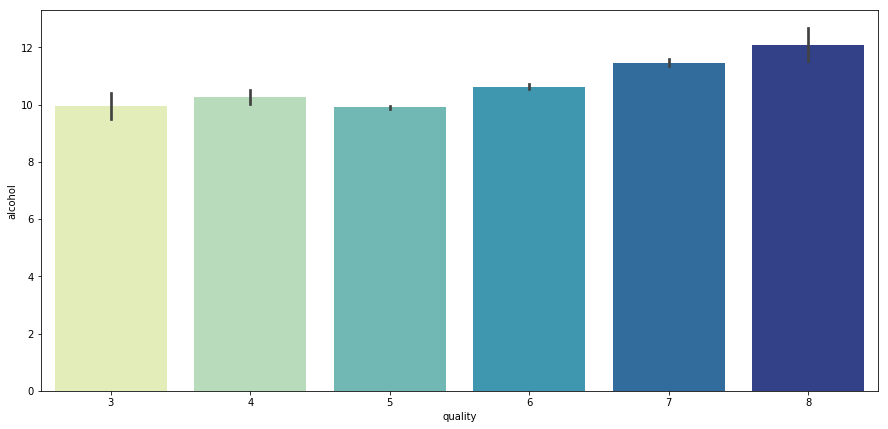

In [8]:
#vedo che i valori di qualità del vino oscillano tra 3 e 8 
#di conseguenza decido di creare una prima possibile divisione per categorie
plt.figure(figsize=(15,7))
sns.barplot(x=df["quality"],y=df["alcohol"],palette="YlGnBu")

Legenda
### 1 == Bassa qualità
### 2 == Alta qualità
### 3 == Media qualità

In [9]:
categorie = []
#creo una lista da poi mettere come nuova colonna nel ds
qualità = dt["qualità"].values
#metto nella variabile qualità i valori all'interno della colonna qualità, grazie all'attributo
#.values
   
for numero in qualità:
    if numero <= 4:
        categorie.append(1) #Vino di Bassa qualità
    elif numero >= 7:
        categorie.append(2) #Vino di alta qualità
    else:
        categorie.append(3) #Vino di media qualità


In [10]:
categorie = pd.DataFrame(data=categorie, columns=["categorie"])
dt = pd.concat([dt, categorie], axis=1)
#in questo momento ho aggiunto la colonna categorie al dataframe.
dt.drop(columns="qualità", axis=1, inplace=True)
#metto i dati ciclati dal for nella cella precedente al posto della colonna rinominata "qualità",
#per far si che le mie modifiche siano permanenti in questa copia, metto inplace=True

In [11]:
dt.categorie.value_counts()
#dopo la suddivisione in categorie, ho ottenuto questi cluster.

3    1319
2     217
1      63
Name: categorie, dtype: int64

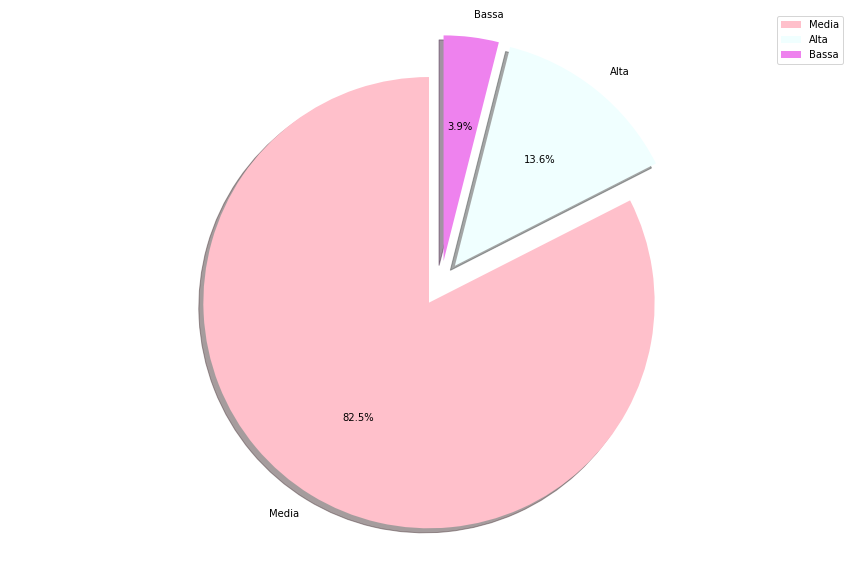

In [12]:
#ora, tramite plt creo un pie chart per avere una migliore visibilità dei dati
labels = 'Media', 'Alta', 'Bassa'
sizes = [1319, 217, 63]
explode = (0.1, 0.1, 0.1) 
colors = ['pink', "azure", "violet"]
fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')
ax1.legend()
plt.show()


# Step 2 
Provo a creare ed allenare il mio primo classificatore
- in primis utilizzo il metodo .iloc() per selezionare la porzione del df che mi interessa da dare in pasto al classificatore;
- successivamente selezionerò allo stesso modo i risultati che sto cercando di predirre.

In [13]:
X = dt.iloc[:, :-1].values
#tutte le righe fino alla colonna meno uno 
y = dt.iloc[:,-1:].values.ravel() #.ravel() è stata una richiesta di sistema
#tutti i valori dell'utlima colonna, ovvero quella che sto cercando di predirre

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
#ho utilizzato un random_state standard per creare coerenza tra l'utilizzo di tutti i classificatori
#la divisione è rimasta classica, ovvero un train di 0.80 e un test di 0.20

### Provo con Random Forest 

In [15]:
rfc = RandomForestClassifier(n_estimators=150, random_state=42)
#in rete ho trovato che un numero di alberi maggiore aiuta la prestazione, di conseguenza non 
#ho appricato in numero standard, ovver n_estimators=10

rfc.fit(X_train, y_train)
#allena il classificatore
y_predict = rfc.predict(X_test)
#faccio la predizione
print("L'accuratezza di RF è: {0:.2f}%".format(accuracy_score(y_test, y_predict)))
print(len(y_predict))
#mostro la lunghezza di ciò che voglio predirre solo per precauzione

L'accuratezza di RF è: 0.87%
320


# Step 3
Come possiamo notare dal classificatore qui sopra, abbiamo ottenuto un'ottima prestazione. 
I miei dati però non sono magnifici: 
Ciò che vogliamo predirre è molto sbilanciato, infatti abbiamo circa un 82% di vini di media qualità e i dati non sono normalizzati. 
Di conseguenza dovrò cambiare il ciclo for, nel quale creavo le categorie e normalizzare.

Giusto per non creare disordine, creo un'altra copia del mio ds.

In [16]:
dt1 = df.copy()

In [17]:
dt1.rename(columns={'fixed acidity': 'acid_del_vino',
                   'volatile acidity': 'acid_volatile',
                   'citric acid': 'acid_critico',
                   'residual sugar': 'zucchero_residuo',
                   'chlorides': 'cloruri',
                   'free sulfur dioxide': 'ani_solf_libera',
                   'total sulfur dioxide': 'ani_solf_totale',
                   'density': 'densità',
                   'pH': 'ph',
                   'sulphates': 'solfiti',
                   'quality': 'qualità'}, inplace=True)

Visto che nella situazione precedente avevamo uno sbilanciamento bello forte, ora cambio un po i valori delle categorie.

In [18]:
categorie = []
#creo una lista da poi mettere come nuova colonna nel ds
qualità = dt1["qualità"].values
   
for numero in qualità:
    if numero <= 5:
        categorie.append(1) #bassa
    elif numero >= 7:
        categorie.append(2) #alta
    else:
        categorie.append(3) #media

In [19]:
categorie = pd.DataFrame(data=categorie, columns=["categorie"])
dt1 = pd.concat([dt1, categorie], axis=1)
dt1.drop(columns="qualità", axis=1, inplace=True)
#metto i dati ciclati dal for nella cella precedente al posto della colonna rinominata "qualità"

In [20]:
dt1.categorie.value_counts()

1    744
3    638
2    217
Name: categorie, dtype: int64

Ora la situazione è nettamente migliorata, di conseguenza mi aspetto che il mio classificatore possa avere una prestazione più scarsa, ma un affidabilità maggiore.

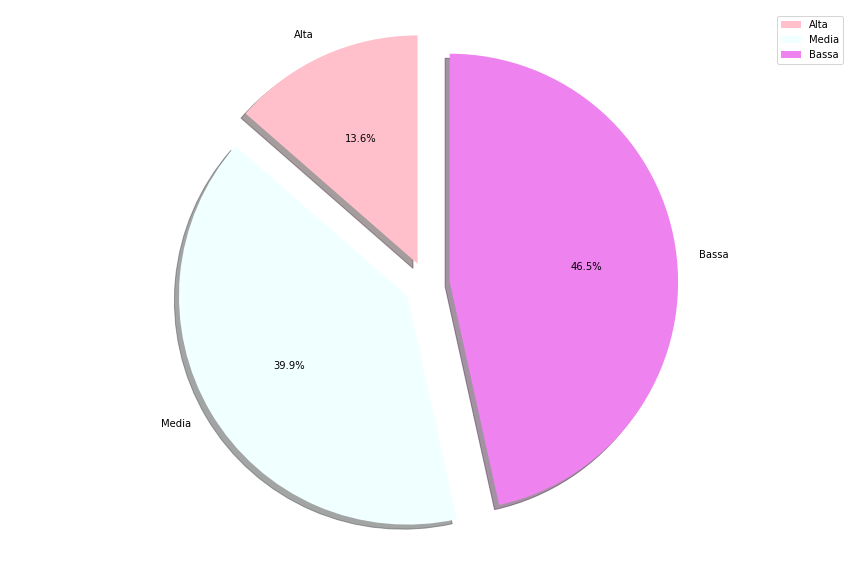

In [21]:
#ora, tramite plt creo un pie chart per avere una migliore visibilità dei dati
labels = 'Alta', 'Media', 'Bassa'
sizes = [217,638,744]
explode = (0.1, 0.1, 0.1) 
colors = ['pink', "azure", "violet"]
fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')
ax1.legend()
plt.show()

Faccio un test e provo ad allenare il classificatore:
- 1) per vedere se la prestazione cambia;
- 2) per vedere il prima e il dopo della normalizzazione.

Ovviamente non metterò alcun timing per via delle modeste dimensioni del mio ds

In [22]:
X1 = dt1.iloc[:, :-1].values
#tutte le righe fino alla colonna meno uno 
y1 = dt1.iloc[:,-1:].values.ravel() #.ravel() è stata una richiesta di sistema
#tutti i valori dell'utlima colonna, ovvero quella che sto cercando di predirre
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2,random_state=42)

In [23]:
rfc1 = RandomForestClassifier(n_estimators=150, random_state=42)
rfc1.fit(X1_train, y1_train)
y_predict1 = rfc1.predict(X1_test)
print("L'accuratezza di RF è: {0:.2f}%".format(accuracy_score(y1_test, y_predict1)*100))
print(len(y_predict1)) #serve solo per vedere se le mie categorie sono rimaste le stesse

L'accuratezza di RF è: 70.62%
320


In [24]:
dt1.columns

Index(['acid_del_vino', 'acid_volatile', 'acid_critico', 'zucchero_residuo',
       'cloruri', 'ani_solf_libera', 'ani_solf_totale', 'densità', 'ph',
       'solfiti', 'alcohol', 'categorie'],
      dtype='object')

# Ok, la prestazione è peggiorata, ma non ho ancora normalizzato.

Provo a normalizzare con MinMaxScaler():

1) normalizzo le colonne che mi serviranno per predirre le categorie

2) creo un'altra partizione

3) controllo i dati 

4) riprovo il classificatore

In [25]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(dt1.iloc[:, :-1].values)
df_normalized = pd.DataFrame(np_scaled)
df_normalized

,0,1,2,3,4,5,6,7,8,9,10
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
5,0.247788,0.369863,0.00,0.061644,0.105175,0.169014,0.120141,0.567548,0.606299,0.137725,0.153846
6,0.292035,0.328767,0.06,0.047945,0.095159,0.197183,0.187279,0.464758,0.440945,0.077844,0.153846
7,0.238938,0.363014,0.00,0.020548,0.088481,0.197183,0.053004,0.332599,0.511811,0.083832,0.246154
8,0.283186,0.315068,0.02,0.075342,0.101836,0.112676,0.042403,0.494126,0.488189,0.143713,0.169231
9,0.256637,0.260274,0.36,0.356164,0.098497,0.225352,0.339223,0.567548,0.480315,0.281437,0.323077


In [26]:
X2 = df_normalized
#tutte le righe fino alla colonna meno uno 
y2 = dt1.iloc[:,-1:].values.ravel() #.ravel() è stata una richiesta di sistema
#tutti i valori dell'utlima colonna, ovvero quella che sto cercando di predirre
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2,random_state=42)

In [27]:
rfc2 = RandomForestClassifier(n_estimators=150, random_state=42)
rfc2.fit(X2_train, y2_train)
y_predict2 = rfc2.predict(X2_test)
print("L'accuratezza di RF normalizzato è: {0:.2f}%".format(accuracy_score(y2_test, y_predict2)*100))
print(len(y_predict2))

L'accuratezza di RF normalizzato è: 70.94%
320


# Le prestazioni sono migliorate
Da come possiamo constatare, dopo aver riequilibrato le categorie, il classificatore ha raggiunto dei risultati differenti, rispetto alla prestazione precedente. 
Dopo la normalizzazione dei dati, la prestazione è aumentata di un **0.3125**.
 

# Step 4
Dopo aver utilizzato RandomForest, decido di utilizzare un'altro classificatore. Credo che in questo contesto sia una buona idea utilizzare KNN (K-Nearest Neighbors). Questo perchè è uno dei migliori per quanto riguarda la predizione di classi di oggetti.

Per farlo utilizzerò i dati di dt1, perchè più equilibrati a mio parere e di conseguenza più interessanti.

In [28]:
knn = KNeighborsClassifier()
knn.fit(X1_train, y1_train)
pred_knn = knn.predict(X1_test)
print(classification_report(y1_test, pred_knn))
print(accuracy_score(y1_test, pred_knn))

             precision    recall  f1-score   support

          1       0.53      0.65      0.59       141
          2       0.42      0.32      0.36        47
          3       0.44      0.37      0.40       132

avg / total       0.48      0.49      0.48       320

0.4875


### La prestazione non è fantastica ma provo ad utilizzare i dati normalizzati

In [29]:
knn_normalizz = KNeighborsClassifier()
knn_normalizz.fit(X2_train, y2_train)
pred_knn_normalizz = knn.predict(X2_test)
print(classification_report(y2_test, pred_knn_normalizz))
print(accuracy_score(y2_test, pred_knn_normalizz))

             precision    recall  f1-score   support

          1       0.44      1.00      0.61       141
          2       0.00      0.00      0.00        47
          3       0.00      0.00      0.00       132

avg / total       0.19      0.44      0.27       320

0.440625


C:\WinPython-64bit-3.6.4.0Qt5b4\python-3.6.4.amd64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Caso curioso 
Ho normalizzato con MinMaxScaler(), ma la prestazione non sembra migliorata affatto, anzi è peggiorata e non di poco. Ora provo a fare lo stesso con altri classificatori e cerco di vedere se capita sempre o meno. D'altronde la normalizzazione non sempre migliora le prestazioni di un classificatore.  
___________________________________________________________________________________________________

La scelta dei classificatori è data da una ricerca nella quale ho compreso che i migliori, nella predizione di categorie x, sono i seguenti:

- Naive Bayes
- Logistic Regression
- Linear SVC
- Decision Tree
- Random Forest (già utilizzato precedentemente)

# Uso Bayes
Anche se Bayes è utile su ds con una capacità migliore della mia provo a testarne la prestazione

$$ P(c|x) = {\frac{P(x|c)P(c)}{P(x)}}$$

In [30]:
naiveb = GaussianNB()
naiveb.fit(X1_train, y1_train)
nb_predict = naiveb.predict(X1_test)
print("L'accuratezza dei GaussianNB è: {0:.2f}%".format(accuracy_score(y1_test, nb_predict)))

L'accuratezza dei GaussianNB è: 0.60%


In [31]:
naivem = MultinomialNB()
naivem.fit(X1_train, y1_train)
nm_predict = naivem.predict(X1_test)
print("L'accuratezza dei MultinomialNB è: {0:.2f}%".format(accuracy_score(y1_test, nm_predict)))

L'accuratezza dei MultinomialNB è: 0.48%


# Provo con i dati normalizzati
Normalizzati con MinMaxScaler()

In [32]:
naiveb_norm = GaussianNB()
naiveb_norm.fit(X2_train, y2_train)
nb_predict_norm = naiveb_norm.predict(X2_test)

naivem_norm = MultinomialNB()
naivem_norm.fit(X2_train, y2_train)
nm_predict_norm = naivem.predict(X2_test)

print("L'accuratezza dei GaussianNB normalizzato è: {0:.2f}%".format(
    accuracy_score(y2_test, nb_predict_norm)))
print("L'accuratezza dei MultinomialNB normalizzato è: {0:.2f}%".format(
    accuracy_score(y2_test, nm_predict_norm)))

L'accuratezza dei GaussianNB normalizzato è: 0.59%
L'accuratezza dei MultinomialNB normalizzato è: 0.41%


# LogisticRegression

In [33]:
log_reg = LogisticRegression().fit(X1_train, y1_train)
log_pred = log_reg.predict(X1_test)

log_reg2 = LogisticRegression().fit(X2_train, y2_train)
log_pred2 = log_reg2.predict(X2_test)

print("L'accuratezza di LR è: {0:.2f}%".format(
    accuracy_score(y1_test, log_pred)))
print("L'accuratezza di LR normalizzato è: {0:.2f}%".format(
    accuracy_score(y2_test, log_pred2)))

L'accuratezza di LR è: 0.61%
L'accuratezza di LR normalizzato è: 0.59%


# Linear SVC

In [34]:
linear_svc = LinearSVC()
linear_svc.fit(X1_train, y1_train)
svc_predict = linear_svc.predict(X1_test)

linear_svc_norm = LinearSVC()
linear_svc_norm.fit(X2_train, y2_train)
svc_predict_norm = linear_svc.predict(X2_test)

print("L'accuratezza di SVC è: {0:.2f}%".format(
    accuracy_score(y1_test, svc_predict)))
print("L'accuratezza di SVC normalizzato è: {0:.2f}%".format(
    accuracy_score(y2_test, svc_predict_norm)))

L'accuratezza di SVC è: 0.55%
L'accuratezza di SVC normalizzato è: 0.44%


# Decision Tree

In [35]:
tree = DecisionTreeClassifier()
tree = tree.fit(X1_train, y1_train)
t_pred = tree.predict(X1_test)

tree2 = DecisionTreeClassifier()
tree2 = tree2.fit(X2_train, y2_train)
t_pred2 = tree2.predict(X2_test)

print("L'accuratezza di Decision Tree è: {0:.2f}%".format(
    accuracy_score(y1_test, t_pred)))
print("L'accuratezza di Decision Tree normalizzato è: {0:.2f}%".format(
    accuracy_score(y2_test, t_pred2)))


L'accuratezza di Decision Tree è: 0.60%
L'accuratezza di Decision Tree normalizzato è: 0.62%


La prestazione di Decision Tree è la migliore e quella che incrementa anche dopo la normalizzazione. 
Era prevedibile anche dal fatto che è successo anche con l'utilizzo di Random Forest, il quale è costituito da n Decision Tree

# Provo a normalizzare con un altro metodo
Visto che la situazione non sembra cambiare, provo a normalizzare con il Normalizer

In [36]:
from sklearn.preprocessing import Normalizer

norm = Normalizer(copy=True)
data_norm = norm.fit_transform(dt1.iloc[:, :-1].values)

In [37]:
X_norm = data_norm
#tutte le righe\ fino alla colonna meno uno 
y_norm = dt1.iloc[:,-1:].values.ravel() #.ravel() è stata una richiesta di sistema
#tutti i valori dell'utlima colonna, ovvero quella che sto cercando di predirre
Xn_train, Xn_test, yn_train, yn_test = train_test_split(X_norm, y_norm, test_size = 0.2,random_state=42)

# Funzione per velocizzare la classificazione
Creo una funzione che prende in input la lista con tutti i classificatori per velocizzare il processo di classificazione e vedere se, tramite la normalizzazione dei dati Normalizer, ottengo uno score differente dai precedenti.

In [38]:
#faccio una lista con tutti i classificatori
lista_funzioni = [RandomForestClassifier(),
                  KNeighborsClassifier(),
                  GaussianNB(),
                  MultinomialNB(),
                  LogisticRegression(),
                  LinearSVC(),
                  DecisionTreeClassifier()]

#creo una funzione che prende un valore della lista_funzioni e resituisce lo score del classificatore
def normalizzatutto (meto):
    for m_class in lista_funzioni:
        classi = m_class.fit(Xn_train, yn_train)
        gino = classi.predict(Xn_test)
        
        print(m_class.__class__.__name__,
              "------------------",
              accuracy_score(yn_test, gino))


In [39]:
normalizzatutto(lista_funzioni)

RandomForestClassifier ------------------ 0.64375
KNeighborsClassifier ------------------ 0.434375
GaussianNB ------------------ 0.5375
MultinomialNB ------------------ 0.440625
LogisticRegression ------------------ 0.475
LinearSVC ------------------ 0.51875
DecisionTreeClassifier ------------------ 0.6125


# Creo una tabella comparativa
in questa tabella comparo tutti i classificatori e i rispettivi score. 
Con accuratezza intendo esclusivamente che quel valore non è normalizzato

In [40]:
label = pd.DataFrame({'Classificatori': ['Random Forest',
                                         'KNN',
                                         'Gaussian',
                                         'Multinomial',
                                         'Logistic Regression',
                                         'Linear SVC',
                                         'Decision Tree'
                                         ],
                     'Accuratezza':[accuracy_score(y1_test, y_predict1),
                                    accuracy_score(y1_test, pred_knn),
                                    accuracy_score(y1_test, nb_predict),
                                    accuracy_score(y1_test, nm_predict),
                                    accuracy_score(y1_test, log_pred),
                                    accuracy_score(y1_test, svc_predict),
                                    accuracy_score(y1_test, t_pred)
                                   ],
                     'MinMaxScaler':[accuracy_score(y2_test, y_predict2),
                                    accuracy_score(y2_test, pred_knn_normalizz),
                                    accuracy_score(y2_test, nb_predict_norm),
                                    accuracy_score(y2_test, nm_predict_norm),
                                    accuracy_score(y2_test, log_pred2),
                                    accuracy_score(y2_test, svc_predict_norm),
                                    accuracy_score(y2_test, t_pred2)
                                    ],
                      'Normalizer': ['0.671875',
                                     '0.434375',
                                     '0.5375',
                                     '0.440625',
                                     '0.475',
                                     '0.51875',
                                     '0.575']})
label                           

,Classificatori,Accuratezza,MinMaxScaler,Normalizer
0,Random Forest,0.706250,0.709375,0.671875
1,KNN,0.487500,0.440625,0.434375
2,Gaussian,0.596875,0.587500,0.5375
3,Multinomial,0.478125,0.412500,0.440625
4,Logistic Regression,0.606250,0.587500,0.475
5,Linear SVC,0.550000,0.440625,0.51875
6,Decision Tree,0.603125,0.621875,0.575


# Cross validation
Applicata a Random Forest

In [59]:
dt_cv = dt1.copy()
_nb = {"prestazione" : []}

In [104]:
maschera = np.random.rand(len(dt_cv)) < 0.8

test_cv = dt_cv[~maschera]
#serve per dare il complementare
train_cv = dt_cv[maschera]

print("la lunghezza della maschera è: "\
      , maschera.shape, ". \n La lunghezza\
    della somma del train e test è: "\
      ,test_cv.shape[0] + train_cv.shape[0])
#mi serve per capire se il dataset ha subito delle modifiche nella creazione della maschera

X_cv = train_cv.iloc[:, :-1].values
#tutte le righe fino alla colonna meno uno 
y_cv = train_cv.iloc[:,-1:].values.ravel() #.ravel() è stata una richiesta di sistema

x_cv_test = test_cv.iloc[:, :-1].values
y_cv_test = np.squeeze(np.asarray(test_cv.iloc[:,-1:].values.ravel()))

rfc_cv = RandomForestClassifier(n_estimators=150)
rfc_cv.fit(X_cv, y_cv)
y_predict_cv = rfc2.predict(x_cv_test)
print("L'accuratezza di RF normalizzato è: {0:.2f}%".format(accuracy_score(y_cv_test, y_predict_cv)))
print(accuracy_score(y_cv_test, y_predict_cv))
print(classification_report(y_cv_test, y_predict_cv))
print(len(y_predict2))


valuenb = (accuracy_score(y_cv_test, y_predict_cv))
if int(len(_nb["prestazione"])) <50:
    _nb["prestazione"].append(valuenb) 
else:
    print("ho finito i miei cicli")

_nb

la lunghezza della maschera è:  (1599,) . 
 La lunghezza    della somma del train e test è:  1599
L'accuratezza di RF normalizzato è: 0.47%
0.466666666667
             precision    recall  f1-score   support

          1       0.44      0.89      0.59       132
          2       1.00      0.05      0.09        42
          3       0.57      0.20      0.29       141

avg / total       0.57      0.47      0.39       315

320


{'prestazione': [0.48620689655172411,
  0.47865853658536583,
  0.48328267477203646,
  0.47507331378299122,
  0.45808383233532934,
  0.42638036809815949,
  0.47416413373860183,
  0.43877551020408162,
  0.43670886075949367,
  0.49832775919732442,
  0.43827160493827161,
  0.49074074074074076,
  0.44411764705882351,
  0.50653594771241828,
  0.44551282051282054,
  0.484375,
  0.50470219435736674,
  0.44585987261146498,
  0.51818181818181819,
  0.4835820895522388,
  0.46964856230031948,
  0.47899159663865548,
  0.48089171974522293,
  0.47368421052631576,
  0.4671280276816609,
  0.49541284403669728,
  0.48427672955974843,
  0.4707792207792208,
  0.49074074074074076,
  0.47909967845659163,
  0.4925373134328358,
  0.47094801223241589,
  0.46710526315789475,
  0.46153846153846156,
  0.4452054794520548,
  0.48036253776435045,
  0.47747747747747749,
  0.44036697247706424,
  0.49140893470790376,
  0.44736842105263158,
  0.44311377245508982,
  0.46666666666666667]}

Se si prova a runnare la cella n(50) volte, si può constatare come i valori oscillino tra il 43% ed un 52% (nella maggior parte dei test che ho fatto)

# Proviamo a droppare 
Ora eseguo un plot sulle dimensioni che ritengo meno pertinenti per predirre le categorie.
Come criterio uso il fatto che sono i dati più scarsi presenti nell'analisi.


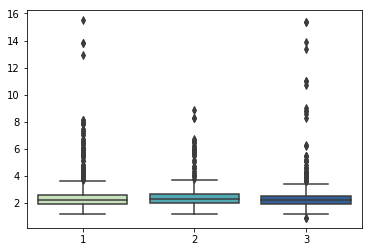

In [43]:
zucchero_residuo = sns.boxplot(x = dt1["categorie"].values, y= dt1["zucchero_residuo"].values, 
                               palette="YlGnBu")

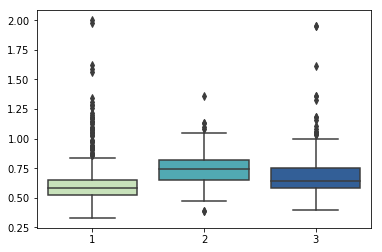

In [44]:
solfiti = sns.boxplot(x = dt1["categorie"].values, y= dt1["solfiti"].values,
                     palette="YlGnBu")

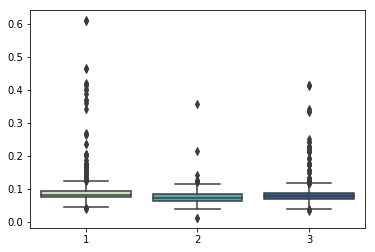

In [45]:
cloruri = sns.boxplot(x = dt1["categorie"].values, y= dt1["cloruri"].values,
                     palette="YlGnBu")

In [46]:
dt_drop = dt1.copy()

In [47]:
dt_drop.columns

Index(['acid_del_vino', 'acid_volatile', 'acid_critico', 'zucchero_residuo',
       'cloruri', 'ani_solf_libera', 'ani_solf_totale', 'densità', 'ph',
       'solfiti', 'alcohol', 'categorie'],
      dtype='object')

In [48]:
dt_drop.drop(columns=['zucchero_residuo', 'solfiti', 'cloruri'], inplace=True)
#elimino le 3 colonne per migliorare la situazione
valori = {"prestazione" : [] }

In [107]:
maschera = np.random.rand(len(dt_drop)) < 0.8

test_cv_drop = dt_drop[~maschera]
#serve per dare il complementare
train_cv_drop = dt_drop[maschera]

print("la lunghezza della maschera è: "\
      , maschera.shape, ". \n La lunghezza\
    della somma del train e test è: "\
      ,test_cv_drop.shape[0] + train_cv_drop.shape[0])

#dr sta per post drop
X_dr = dt_drop.iloc[:, :-1].values
#tutte le righe fino alla colonna meno uno 
y_dr = dt_drop.iloc[:,-1:].values.ravel() #.ravel() è stata una richiesta di sistema

x_cv_test_drop = test_cv_drop.iloc[:, :-1].values
y_cv_test_drop = np.squeeze(np.asarray(test_cv_drop.iloc[:,-1:].values.ravel()))


naivem_dr = MultinomialNB()
naivem_dr.fit(X_dr, y_dr)
nm_predict_dr = naivem_dr.predict(x_cv_test_drop)
print("L'accuratezza dei MultinomialNB è: {0:.2f}%".format(accuracy_score(y_cv_test_drop, 
                                                                          nm_predict_dr)))

rfc_dr = RandomForestClassifier()
rfc_dr.fit(X_dr, y_dr)
y_predict_dr = rfc_dr.predict(x_cv_test_drop)
print("L'accuratezza di RF è: {0:.2f}%".format(accuracy_score(y_cv_test_drop, y_predict_dr)))
print("accuratezza random forest: ", accuracy_score(y_cv_test_drop, y_predict_dr))
print(len(y_predict_dr))


value = (accuracy_score(y_cv_test_drop, y_predict_dr))
valori["prestazione"].append(value)
valori

valuenb = (accuracy_score(y_cv_test_drop, y_predict_dr))
if int(len(valori["prestazione"])) <50:
    valori["prestazione"].append(valuenb) 
else:
    print("ho finito i miei cicli")
valori

la lunghezza della maschera è:  (1599,) . 
 La lunghezza    della somma del train e test è:  1599
L'accuratezza dei MultinomialNB è: 0.45%
L'accuratezza di RF è: 0.99%
accuratezza random forest:  0.990506329114
316


{'prestazione': [0.98456790123456794,
  0.984375,
  0.98734177215189878,
  0.99371069182389937,
  0.99371069182389937,
  0.98422712933753942,
  0.98422712933753942,
  0.990506329113924,
  0.990506329113924]}

# Conclusioni
I migliori classificatori sono stati Decision Tree e Random Forest.
Dopo aver eliminato le colonne non rilevanti dal mio dataset, le prestazioni di Random Forest sono aumentate drasticamente, mentre nel caso del multinomiale non ci sono stati aumenti rilevanti. 

La struttura del dataset non mi permetteva di aver abbastanza informazioni per comprendere se il vino fosse realmente di qualità o meno, come ad esempio il luogo d'origine o l'odore. 